In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [10]:
x = np.arange(20)

In [11]:
x.shape

(20,)

In [12]:
X = np.vstack((np.ones(len(x)),x, x**2, x**3, x**4, x**5)).T

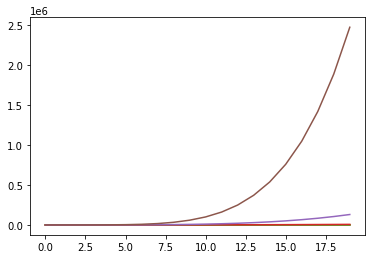

In [13]:
plt.plot(X)

In [14]:
val, vec = np.linalg.eig(np.dot(X.T, X))

[]

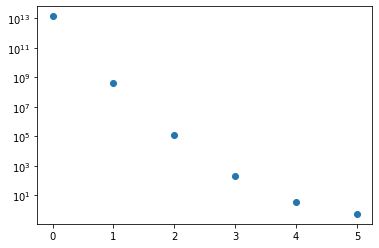

In [15]:
plt.plot(val,'o')
plt.semilogy()

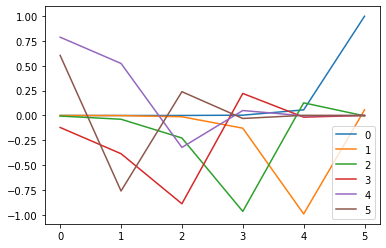

In [16]:
plt.plot(vec)
plt.legend(np.arange(6))

In [17]:
y = np.sin(2*np.pi * x / 20)  + np.random.normal(size=x.shape)*.3
ytrue = np.sin(2*np.pi * x / 20) 


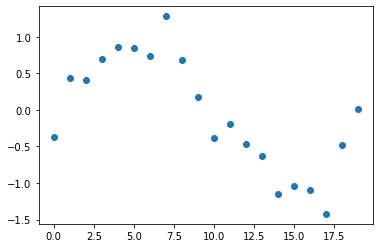

In [18]:
plt.plot(x,y, 'o')

In [19]:
import numpy.linalg
w = np.linalg.lstsq(X,y)

<ipython-input-19-03c25e379670>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(X,y)


In [20]:
w[0]

array([-2.86609782e-01,  5.45686642e-01, -7.31417964e-02,  3.12337134e-03,
       -1.51622087e-04,  5.92913802e-06])

In [21]:
yfit = w[0][0] +w[0][1]*x +w[0][2] * x**2 + w[0][3]*x **3  +w[0][4]*x **4 +w[0][5]*x **5

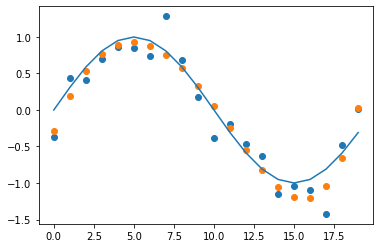

In [22]:
plt.scatter(x,y)
plt.scatter(x, yfit)
plt.plot(x, ytrue)

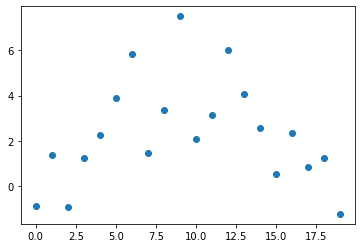

In [23]:
y2  = x -0.05*x**2 + np.random.normal(size=x.shape)*2
plt.scatter(x, y2)

<ipython-input-24-d3c673b8520c>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w2 = np.linalg.lstsq(X,y2)


array([-4.53354173e-01,  1.17657067e-01,  2.86513821e-01, -4.43448403e-02,
        2.38839834e-03, -4.56680158e-05])

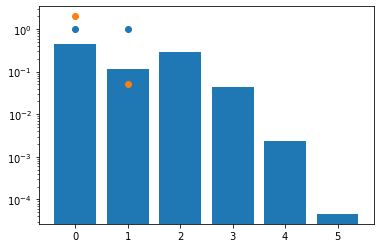

In [24]:
w2 = np.linalg.lstsq(X,y2)
plt.bar(np.arange(len(w2[0])), np.abs(w2[0]))
plt.plot([[1, 2], [1, .05]], 'o')
plt.semilogy()
w2[0]

In [25]:
opt.x, w2[0]
plt.scatter(x,  np.dot(X, opt.x))
plt.scatter(x,  np.dot(X, w2[0]))
plt.scatter(x, y2)

NameError: name 'opt' is not defined

In [ ]:
np.dot(X, opt.x)

In [ ]:
opt = scipy.optimize.minimize(linear_SSE, opt.x)

In [ ]:
opt.x.shape, X.shape


In [ ]:
opt.x, w2

In [26]:
galton = pd.read_csv("galton.csv")

In [27]:
galton.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [28]:
galton["indicator"]= galton["gender"] == "male"

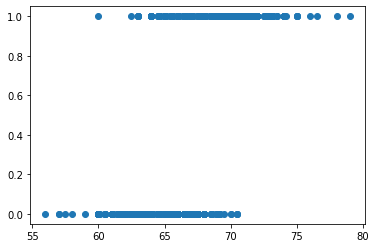

In [29]:
plt.scatter(galton.childHeight, galton.indicator)

In [30]:
lin = scipy.stats.linregress(galton.childHeight, galton.indicator)

In [31]:
lin

LinregressResult(slope=0.1001285906458392, intercept=-6.168186756825555, rvalue=0.7167090749623363, pvalue=4.681854227158651e-148, stderr=0.0031913315544015823)

In [32]:
height = np.arange(55, 80)
linreg = lin.intercept + lin.slope * height 

Decision boundary is at 
$$ b_0 + b_1 x_{crit} = 0.5 $$
so 
$$ x_{crit} = (0.5 - b_0) / b_1 $$
What are we expecting?  
Women have a mean around 64 (162 cm)
Men a mean around 69 (175 cm)
so this better be in the middle around 66 or 67!

In [33]:
xcrit = (0.5 - lin.intercept ) / lin.slope
xcrit

66.59623104465066

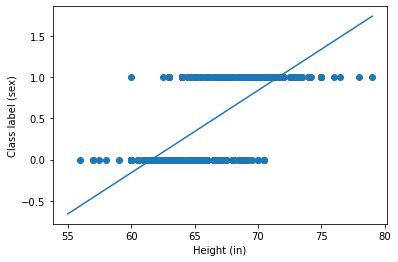

In [34]:
plt.scatter(galton.childHeight, galton.indicator)
plt.plot(height, linreg)
plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.savefig("Linear-galton.png")

In [35]:
import sklearn
from sklearn.linear_model import LogisticRegression


In [36]:
# The magic command is LogisitcRegression.fit(x,y)
clf = LogisticRegression(random_state=0).fit(galton.childHeight.values.reshape([-1,1]), galton.indicator.values.reshape([-1,1]))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
# And the return data structure has attributes 
# .coef_ and .intercept_.
# Note you have to access them by clf.coef_[0]
clf.coef_

array([[0.79976927]])

In [38]:
clf.intercept_

array([-53.18723093])

In [39]:
logistic = 1 / (1+np.exp( - clf.coef_[0] * height - clf.intercept_[0]))

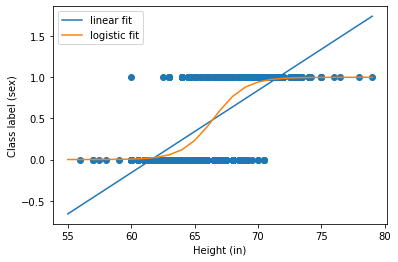

In [40]:
plt.scatter(galton.childHeight, galton.indicator)
plt.plot(height, linreg, label="linear fit")
plt.plot(height, logistic, label="logistic fit")
plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.savefig("Linear-galton2.png")

In [45]:
logg =  1 / (1+np.exp( - clf.coef_[0] * galton.childHeight.values - clf.intercept_[0]))
line = lin.intercept + lin.slope * galton.childHeight 
losslog = (galton.indicator ) * np.log(logg )+ (1-galton.indicator)*np.log(1-logg)
losslin = (line - galton.indicator)**2


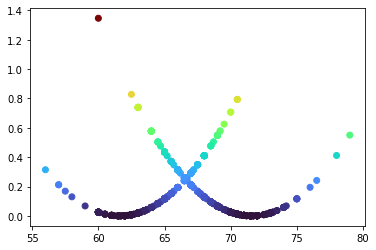

In [66]:
plt.scatter(galton.childHeight, losslin, c=losslin, cmap="turbo")

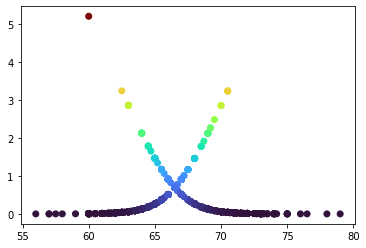

In [69]:
plt.scatter(galton.childHeight, -losslog, c=-losslog, cmap="turbo")

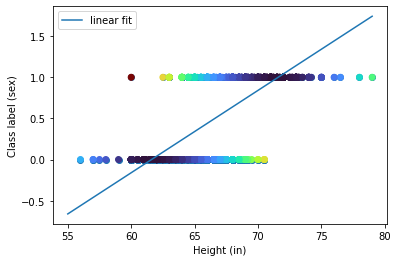

In [71]:
plt.scatter(galton.childHeight, galton.indicator)
plt.scatter(galton.childHeight, galton.indicator, c=losslin, cmap="turbo")
#plt.scatter(galton.childHeight, losslog, c=losslin, cmap="turbo")
plt.plot(height, linreg, label="linear fit")

plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.savefig("Linear-galton2c.png", bbox_inches="tight", dpi=300)

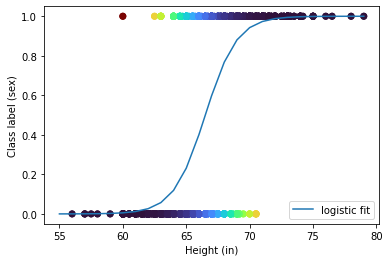

In [63]:
plt.scatter(galton.childHeight, galton.indicator, c=-losslog, cmap="turbo")
plt.scatter(galton.childHeight, galton.indicator, c=-losslog, cmap="turbo")
plt.plot(height, logistic, label="logistic fit")

plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.savefig("Logistic-galton2c.png", bbox_inches="tight", dpi=300)